In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('DM8_SMSSpamCollection.csv', names = ['Label', 'Message'])

In [4]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5574, 2)

In [6]:
df = df.sample(frac=0.85, random_state=42, axis = 0, ignore_index = True)

In [7]:
df.shape

(4738, 2)

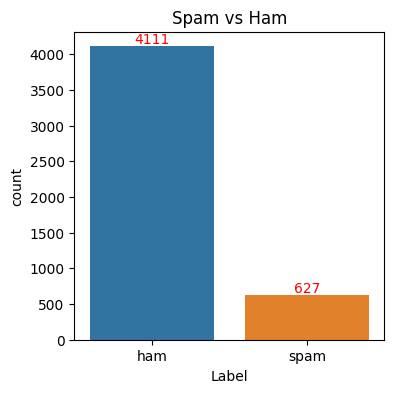

In [8]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Label', data=df)
plt.title('Spam vs Ham')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            color='red', ha='center', va='bottom')

plt.show()

In [9]:
print(df['Label'].value_counts())
print(df['Label'].value_counts(normalize=True))

ham     4111
spam     627
Name: Label, dtype: int64
ham     0.867666
spam    0.132334
Name: Label, dtype: float64


In [10]:
import re
df['Cleaned Message'] = df['Message'].apply(lambda x: re.sub(r'\W+', ' ', x).strip())

In [11]:
df.head()

,Label,Message,Cleaned Message
0,ham,You still coming tonight?,You still coming tonight
1,ham,HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DEA...,HEY BABE FAR 2 SPUN OUT 2 SPK AT DA MO DEAD 2 ...
2,ham,Ya even those cookies have jelly on them,Ya even those cookies have jelly on them
3,ham,Sorry i've not gone to that place. I.ll do so ...,Sorry i ve not gone to that place I ll do so t...
4,ham,When are you going to ride your bike?,When are you going to ride your bike


In [12]:
df['Word Count'] = df['Cleaned Message'].str.split().str.len()

In [13]:
val = df.groupby('Label')['Word Count'].mean()
print(val)
avg_word_count = val. values
message_catagory = val.index

Label
ham     14.777426
spam    25.853270
Name: Word Count, dtype: float64


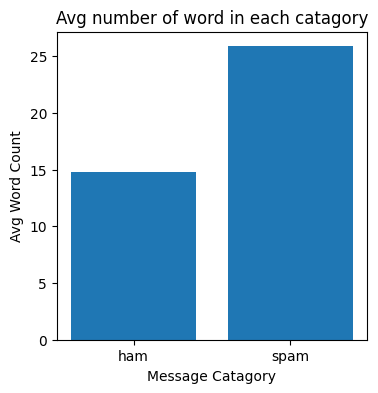

In [14]:
plt.figure(figsize=(4, 4))
plt.bar(message_catagory,avg_word_count)
plt.xlabel('Message Catagory')
plt.ylabel('Avg Word Count')
plt.title('Avg number of word in each catagory')
plt.show()

In [15]:
df.shape

(4738, 4)

In [16]:
df.head()

,Label,Message,Cleaned Message,Word Count
0,ham,You still coming tonight?,You still coming tonight,4
1,ham,HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DEA...,HEY BABE FAR 2 SPUN OUT 2 SPK AT DA MO DEAD 2 ...,38
2,ham,Ya even those cookies have jelly on them,Ya even those cookies have jelly on them,8
3,ham,Sorry i've not gone to that place. I.ll do so ...,Sorry i ve not gone to that place I ll do so t...,15
4,ham,When are you going to ride your bike?,When are you going to ride your bike,8


In [17]:
text = ""

for i in range(10):
    text += df['Cleaned Message'].loc[i].lower() + "\n"
print(text)


you still coming tonight
hey babe far 2 spun out 2 spk at da mo dead 2 da wrld been sleeping on da sofa all day had a cool nytho tx 4 fonin hon call 2mwen im bk frmcloud 9 j x
ya even those cookies have jelly on them
sorry i ve not gone to that place i ll do so tomorrow really sorry
when are you going to ride your bike
daddy shu shu is looking 4 u u wan me 2 tell him u re not in singapore or wat
don t think about what u have got think about how to use it that you have got good ni8
the lay man just to let you know you are missed and thought off do have a great day and if you can send me bimbo and ugo s numbers ill appreciate safe
thank you do you generally date the brothas
what you did in leave



In [18]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(text)
print(tokenized_sent)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['you still coming tonight\nhey babe far 2 spun out 2 spk at da mo dead 2 da wrld been sleeping on da sofa all day had a cool nytho tx 4 fonin hon call 2mwen im bk frmcloud 9 j x\nya even those cookies have jelly on them\nsorry i ve not gone to that place i ll do so tomorrow really sorry\nwhen are you going to ride your bike\ndaddy shu shu is looking 4 u u wan me 2 tell him u re not in singapore or wat\ndon t think about what u have got think about how to use it that you have got good ni8\nthe lay man just to let you know you are missed and thought off do have a great day and if you can send me bimbo and ugo s numbers ill appreciate safe\nthank you do you generally date the brothas\nwhat you did in leave']


In [19]:
from nltk.tokenize import word_tokenize
tokenized_word= word_tokenize(text)
print(tokenized_word)

['you', 'still', 'coming', 'tonight', 'hey', 'babe', 'far', '2', 'spun', 'out', '2', 'spk', 'at', 'da', 'mo', 'dead', '2', 'da', 'wrld', 'been', 'sleeping', 'on', 'da', 'sofa', 'all', 'day', 'had', 'a', 'cool', 'nytho', 'tx', '4', 'fonin', 'hon', 'call', '2mwen', 'im', 'bk', 'frmcloud', '9', 'j', 'x', 'ya', 'even', 'those', 'cookies', 'have', 'jelly', 'on', 'them', 'sorry', 'i', 've', 'not', 'gone', 'to', 'that', 'place', 'i', 'll', 'do', 'so', 'tomorrow', 'really', 'sorry', 'when', 'are', 'you', 'going', 'to', 'ride', 'your', 'bike', 'daddy', 'shu', 'shu', 'is', 'looking', '4', 'u', 'u', 'wan', 'me', '2', 'tell', 'him', 'u', 're', 'not', 'in', 'singapore', 'or', 'wat', 'don', 't', 'think', 'about', 'what', 'u', 'have', 'got', 'think', 'about', 'how', 'to', 'use', 'it', 'that', 'you', 'have', 'got', 'good', 'ni8', 'the', 'lay', 'man', 'just', 'to', 'let', 'you', 'know', 'you', 'are', 'missed', 'and', 'thought', 'off', 'do', 'have', 'a', 'great', 'day', 'and', 'if', 'you', 'can', 'send'

<FreqDist with 116 samples and 159 outcomes>


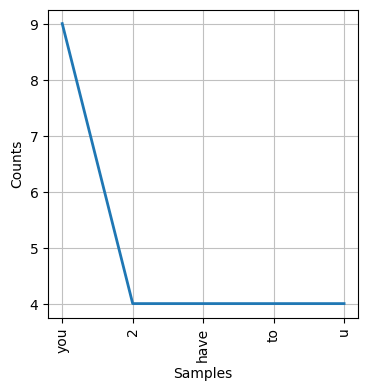

In [20]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)
plt.figure(figsize=(4, 4))
fdist.plot(5, cumulative=False)
plt.show()

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
filtered_sent = []
for i in tokenized_word:
    if i not in stop_words :
        filtered_sent.append(i)
print(filtered_sent)
print(tokenized_word)

['still', 'coming', 'tonight', 'hey', 'babe', 'far', '2', 'spun', '2', 'spk', 'da', 'mo', 'dead', '2', 'da', 'wrld', 'sleeping', 'da', 'sofa', 'day', 'cool', 'nytho', 'tx', '4', 'fonin', 'hon', 'call', '2mwen', 'im', 'bk', 'frmcloud', '9', 'j', 'x', 'ya', 'even', 'cookies', 'jelly', 'sorry', 'gone', 'place', 'tomorrow', 'really', 'sorry', 'going', 'ride', 'bike', 'daddy', 'shu', 'shu', 'looking', '4', 'u', 'u', 'wan', '2', 'tell', 'u', 'singapore', 'wat', 'think', 'u', 'got', 'think', 'use', 'got', 'good', 'ni8', 'lay', 'man', 'let', 'know', 'missed', 'thought', 'great', 'day', 'send', 'bimbo', 'ugo', 'numbers', 'ill', 'appreciate', 'safe', 'thank', 'generally', 'date', 'brothas', 'leave']
['you', 'still', 'coming', 'tonight', 'hey', 'babe', 'far', '2', 'spun', 'out', '2', 'spk', 'at', 'da', 'mo', 'dead', '2', 'da', 'wrld', 'been', 'sleeping', 'on', 'da', 'sofa', 'all', 'day', 'had', 'a', 'cool', 'nytho', 'tx', '4', 'fonin', 'hon', 'call', '2mwen', 'im', 'bk', 'frmcloud', '9', 'j', 'x'

In [23]:
filtered_sent.clear()

In [24]:
new_stopwords = {'ugo', 'bk', 'ya', '2', '4', 'da', 'shu'}
expanded_stopwords = stop_words.union(new_stopwords)
filtered_sent = []
for word in tokenized_word:
    if word.lower() not in expanded_stopwords:
        filtered_sent.append(word)

print(filtered_sent)
print(tokenized_word)

['still', 'coming', 'tonight', 'hey', 'babe', 'far', 'spun', 'spk', 'mo', 'dead', 'wrld', 'sleeping', 'sofa', 'day', 'cool', 'nytho', 'tx', 'fonin', 'hon', 'call', '2mwen', 'im', 'frmcloud', '9', 'j', 'x', 'even', 'cookies', 'jelly', 'sorry', 'gone', 'place', 'tomorrow', 'really', 'sorry', 'going', 'ride', 'bike', 'daddy', 'looking', 'u', 'u', 'wan', 'tell', 'u', 'singapore', 'wat', 'think', 'u', 'got', 'think', 'use', 'got', 'good', 'ni8', 'lay', 'man', 'let', 'know', 'missed', 'thought', 'great', 'day', 'send', 'bimbo', 'numbers', 'ill', 'appreciate', 'safe', 'thank', 'generally', 'date', 'brothas', 'leave']
['you', 'still', 'coming', 'tonight', 'hey', 'babe', 'far', '2', 'spun', 'out', '2', 'spk', 'at', 'da', 'mo', 'dead', '2', 'da', 'wrld', 'been', 'sleeping', 'on', 'da', 'sofa', 'all', 'day', 'had', 'a', 'cool', 'nytho', 'tx', '4', 'fonin', 'hon', 'call', '2mwen', 'im', 'bk', 'frmcloud', '9', 'j', 'x', 'ya', 'even', 'those', 'cookies', 'have', 'jelly', 'on', 'them', 'sorry', 'i', 

<FreqDist with 67 samples and 74 outcomes>


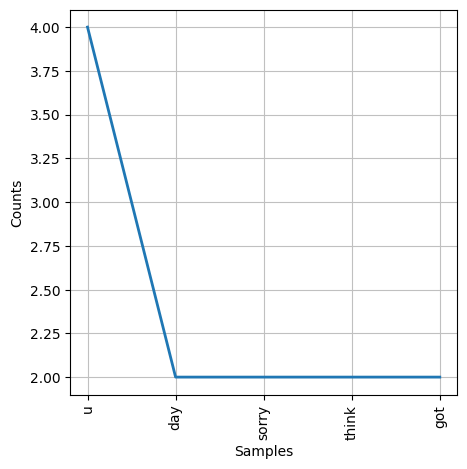

In [25]:
fdist = FreqDist(filtered_sent)
print(fdist)
plt.figure(figsize=(5, 5))
fdist.plot(5, cumulative=False)
plt.show()

In [26]:
#3

In [27]:
label_map = {'ham': 0, 'spam': 1}
df['Label'] = df['Label'].map(label_map)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer (r'[a-zA-Z0-9]+')

In [29]:
cv = CountVectorizer(lowercase =True, stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['Message'])
print(text_counts)

  (0, 1942)	1
  (0, 7018)	1
  (1, 3460)	1
  (1, 1203)	1
  (1, 2819)	1
  (1, 361)	3
  (1, 6466)	1
  (1, 6436)	1
  (1, 2182)	3
  (1, 4582)	1
  (1, 2230)	1
  (1, 7664)	1
  (1, 6269)	1
  (1, 6336)	1
  (1, 2225)	1
  (1, 2039)	1
  (1, 4908)	1
  (1, 7143)	1
  (1, 497)	1
  (1, 2970)	1
  (1, 3518)	1
  (1, 421)	1
  (1, 3658)	1
  (1, 1384)	1
  (1, 3054)	1
  :	:
  (4734, 6792)	1
  (4734, 3031)	1
  (4734, 5627)	1
  (4734, 1802)	1
  (4735, 3460)	1
  (4735, 4467)	1
  (4735, 5221)	1
  (4735, 7428)	1
  (4735, 6981)	1
  (4735, 899)	1
  (4735, 2499)	1
  (4735, 5711)	1
  (4735, 3126)	1
  (4735, 7718)	1
  (4736, 7162)	2
  (4736, 4120)	1
  (4736, 5918)	1
  (4736, 4541)	1
  (4736, 6904)	1
  (4736, 6881)	1
  (4736, 2239)	1
  (4736, 2875)	1
  (4736, 1017)	1
  (4737, 908)	1
  (4737, 3715)	1


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [30]:
print(cv.vocabulary_)

{'coming': 1942, 'tonight': 7018, 'hey': 3460, 'babe': 1203, 'far': 2819, '2': 361, 'spun': 6466, 'spk': 6436, 'da': 2182, 'mo': 4582, 'dead': 2230, 'wrld': 7664, 'sleeping': 6269, 'sofa': 6336, 'day': 2225, 'cool': 2039, 'nytho': 4908, 'tx': 7143, '4': 497, 'fonin': 2970, 'hon': 3518, '2mwen': 421, 'im': 3658, 'bk': 1384, 'frmcloud': 3054, '9': 756, 'j': 3811, 'x': 7681, 'ya': 7706, 'cookies': 2037, 'jelly': 3845, 'sorry': 6374, 've': 7311, 'gone': 3221, 'place': 5255, 'll': 4198, 'tomorrow': 7009, 'really': 5651, 'going': 3213, 'ride': 5830, 'bike': 1360, 'daddy': 2187, 'shu': 6192, 'looking': 4236, 'u': 7162, 'wan': 7425, 'tell': 6822, 'singapore': 6227, 'wat': 7448, 'don': 2447, 't': 6737, 'think': 6906, 'got': 3241, 'use': 7268, 'good': 3225, 'ni8': 4807, 'lay': 4077, 'man': 4378, 'just': 3912, 'let': 4120, 'know': 3997, 'missed': 4552, 'thought': 6921, 'great': 3279, 'send': 6065, 'bimbo': 1367, 'ugo': 7170, 's': 5918, 'numbers': 4892, 'ill': 3656, 'appreciate': 1039, 'safe': 592

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, df['Label'], test_size = 0.3, random_state=42)

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(predicted, y_test))

MultinomialNB Accuracy: 0.9746835443037974


In [33]:
total_samples = len(df)
class_counts = df['Label'].value_counts()
# Calculate prior probabilities for each class
prior_probabilities = class_counts / total_samples

# Display prior probabilities
print("Prior Probabilities:")
print(prior_probabilities)

Prior Probabilities:
0    0.867666
1    0.132334
Name: Label, dtype: float64


In [34]:
#4

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(stop_words='english')
text_tf = tf.fit_transform(df['Message'])
print(text_tf)

  (0, 7020)	0.6950244285581829
  (0, 1938)	0.7189861220547802
  (1, 3054)	0.24093168457965744
  (1, 1375)	0.2297931948714108
  (1, 3659)	0.14405940229063197
  (1, 418)	0.24093168457965744
  (1, 3519)	0.22189031065480788
  (1, 2969)	0.24093168457965744
  (1, 7146)	0.24093168457965744
  (1, 4908)	0.24093168457965744
  (1, 2035)	0.16077790902549996
  (1, 2222)	0.11747092390492934
  (1, 6337)	0.2065171636938412
  (1, 6270)	0.18057195731346498
  (1, 7669)	0.24093168457965744
  (1, 2227)	0.19961333123831457
  (1, 4583)	0.1967189834982935
  (1, 2179)	0.39329258995237154
  (1, 6438)	0.22189031065480788
  (1, 6468)	0.24093168457965744
  (1, 2818)	0.18558049379004687
  (1, 1194)	0.14365836019390513
  (1, 3460)	0.13575547597730217
  (2, 3848)	0.6561826189356059
  (2, 2033)	0.6258467029248245
  :	:
  (4734, 4953)	0.1630384866490809
  (4734, 2206)	0.31004688500907707
  (4734, 7633)	0.24115166833437965
  (4734, 6065)	0.1761082908368719
  (4734, 3460)	0.19971624568007756
  (4735, 7721)	0.417123137403

In [36]:
print(tf.vocabulary_)

{'coming': 1938, 'tonight': 7020, 'hey': 3460, 'babe': 1194, 'far': 2818, 'spun': 6468, 'spk': 6438, 'da': 2179, 'mo': 4583, 'dead': 2227, 'wrld': 7669, 'sleeping': 6270, 'sofa': 6337, 'day': 2222, 'cool': 2035, 'nytho': 4908, 'tx': 7146, 'fonin': 2969, 'hon': 3519, '2mwen': 418, 'im': 3659, 'bk': 1375, 'frmcloud': 3054, 'ya': 7709, 'cookies': 2033, 'jelly': 3848, 'sorry': 6375, 've': 7314, 'gone': 3220, 'place': 5255, 'll': 4200, 'tomorrow': 7011, 'really': 5650, 'going': 3212, 'ride': 5830, 'bike': 1351, 'daddy': 2184, 'shu': 6193, 'looking': 4238, 'wan': 7427, 'tell': 6823, 'singapore': 6228, 'wat': 7451, 'don': 2446, 'think': 6908, 'got': 3240, 'use': 7271, 'good': 3224, 'ni8': 4807, 'lay': 4079, 'man': 4379, 'just': 3916, 'let': 4122, 'know': 4000, 'missed': 4553, 'thought': 6923, 'great': 3278, 'send': 6065, 'bimbo': 1358, 'ugo': 7172, 'numbers': 4892, 'ill': 3657, 'appreciate': 1030, 'safe': 5928, 'thank': 6872, 'generally': 3145, 'date': 2214, 'brothas': 1536, 'did': 2336, 'lea

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, df['Label'], test_size = 0.3, random_state=1)

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(predicted, y_test))

MultinomialNB Accuracy: 0.9669479606188467


In [39]:
# 5

In [40]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2)
km.fit(text_tf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [41]:
clusters = km.predict(text_tf)

In [42]:
print(type(clusters))

<class 'numpy.ndarray'>


In [43]:
print(len(clusters))

4738


In [44]:
print(set(clusters))

{0, 1}


In [45]:
print(clusters)

[0 0 0 ... 0 0 0]


In [46]:
from sklearn.decomposition import PCA
clusters = km.predict(text_tf)
pca = PCA(n_components = 2)

In [ ]:
two_dim = pca.fit_transform(np.asarray(text_tf.todense()))
scatter_x = two_dim[:,0]
scatter_y = two_dim[:,1]

In [ ]:
text_tf.data.shape
text_tf.data = np.nan_to_num(text_tf.data)
text_tf.eliminate_zeros()
text_tf.data.shape

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(4,4)
cmap = {0: 'yellow', 1: 'green'}
for group in np.unique(clusters):

    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)
ax.legend()
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()

In [ ]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

In [ ]:
terms = tf.get_feature_names_out()
for i in range(2):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

In [ ]:
# 6

In [ ]:
df = pd.read_csv('Something_just_like_this.txt', delimiter='\t', header=None, names=['Lines'])

In [ ]:
df

In [ ]:
lines = ""

for line in df.Lines:
    if isinstance(line, str):  # Check if the line is a string
        lines += line.lower() + "\n"
    else:
        pass
print(lines)

In [ ]:
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
from nltk.tokenize import word_tokenize
tokenized_word= word_tokenize(lines)
print(tokenized_word)

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
filtered_word = []
for word in tokenized_word:
    if word not in stop_words :
        filtered_word.append(word)

In [ ]:
print(filtered_word)

In [ ]:
word = ''
for i in filtered_word:
    word+= i + '\n'
print(word)

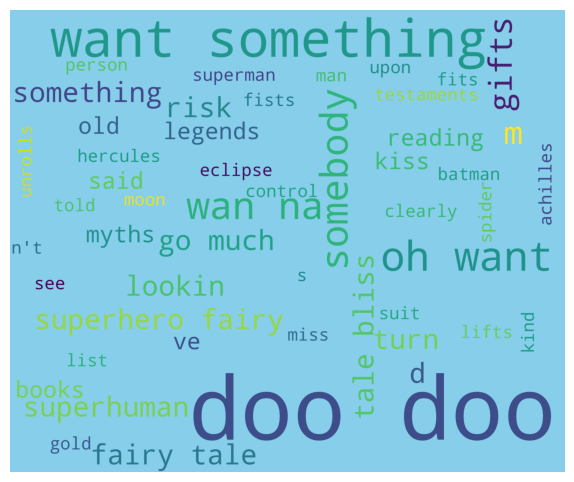

In [78]:
wordcloud = WordCloud(background_color='skyblue', width=3000, height=2500).generate(word)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [73]:
new_stopwords = ['ve', "n't", 'na', 'doo', 's', 'doo-doo-doo']
new_stopword_list = stop_words.union(new_stopwords)
filtered_word_1 = []
for i in filtered_word:
    #print(i)
    if i not in new_stopword_list :
        filtered_word_1.append(i)

In [74]:
print(filtered_word_1)

["'ve", 'reading', 'books', 'old', 'legends', 'myths', 'achilles', 'gold', 'hercules', 'gifts', 'spider-man', "'s", 'control', 'batman', 'fists', 'clearly', 'see', 'upon', 'list', 'said', ',', "'d", 'wan', 'go', '?', 'much', 'wan', 'risk', '?', "'m", 'lookin', "'", 'somebody', 'superhuman', 'gifts', 'superhero', 'fairy-tale', 'bliss', 'something', 'turn', 'somebody', 'kiss', 'want', 'something', 'like', ',', ',', 'doo-doo', ',', 'oh', ',', 'want', 'something', 'like', ',', ',', 'doo-doo', ',', 'oh', ',', 'want', 'something', 'like', 'want', 'something', 'like', "'ve", 'reading', 'books', 'old', 'legends', 'myths', 'testaments', 'told', 'moon', 'eclipse', 'superman', 'unrolls', 'suit', 'lifts', "'m", 'kind', 'person', 'fits', 'said', ',', "'d", 'wan', 'go', '?', 'much', 'wan', 'risk', '?', "'m", 'lookin', "'", 'somebody', 'superhuman', 'gifts', 'superhero', 'fairy-tale', 'bliss', 'something', 'turn', 'somebody', 'miss', 'want', 'something', 'like', 'want', 'something', 'like', 'oh', ','

In [75]:
word1 = ''
for i in filtered_word_1:
    word1 += i + '\n'
print(word1)

've
reading
books
old
legends
myths
achilles
gold
hercules
gifts
spider-man
's
control
batman
fists
clearly
see
upon
list
said
,
'd
wan
go
?
much
wan
risk
?
'm
lookin
'
somebody
superhuman
gifts
superhero
fairy-tale
bliss
something
turn
somebody
kiss
want
something
like
,
,
doo-doo
,
oh
,
want
something
like
,
,
doo-doo
,
oh
,
want
something
like
want
something
like
've
reading
books
old
legends
myths
testaments
told
moon
eclipse
superman
unrolls
suit
lifts
'm
kind
person
fits
said
,
'd
wan
go
?
much
wan
risk
?
'm
lookin
'
somebody
superhuman
gifts
superhero
fairy-tale
bliss
something
turn
somebody
miss
want
something
like
want
something
like
oh
,
want
something
like
,
,
doo-doo
,
oh
,
want
something
like
,
,
doo-doo
,
'd
wan
go
?
much
wan
risk
?
'm
lookin
'
somebody
superhuman
gifts
superhero
fairy-tale
bliss
something
turn
somebody
kiss
want
something
like
oh
,
want
something
like
oh
,
want
something
like
oh
,
want
something
like



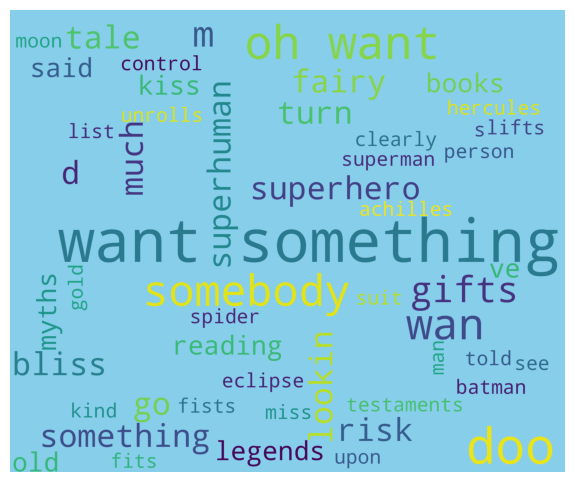

In [79]:
wordcloud = WordCloud(background_color='skyblue', width=3000, height=2500).generate(word1)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [67]:
from PIL import Image
violin_mask = np.array(Image.open("violin_mask.png"))

In [68]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [69]:
transformed_violin_mask = np.ndarray((violin_mask.shape[0],violin_mask.shape[1]), np.int32)
for i in range(len(violin_mask)):
    transformed_violin_mask[i] = list(map(transform_format, violin_mask[i]))

In [70]:
wc = WordCloud(background_color="black", mask=transformed_violin_mask, width=2000, height=2000,
               stopwords=new_stopword_list, contour_width=2, contour_color="firebrick")
wc.generate(word1)

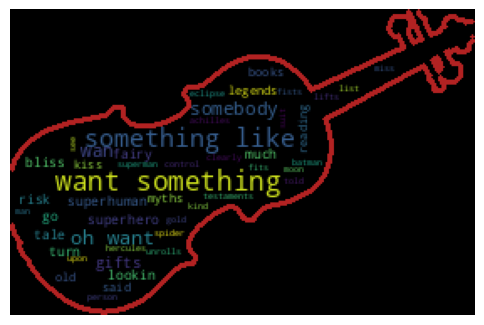

In [80]:
plt.figure(figsize=(6, 4))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [72]:
wc.to_file("wordcloud-violinmask.png")